In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [54]:
def weight_variable(shape):
    initial_value = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial_value)

def bias_variable(shape):
    initial_value = tf.constant(0.1, shape=shape)
    return tf.Variable(initial_value)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [55]:
# Input placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_target = tf.placeholder(tf.float32, shape=[None, 10])
# Input layer #1
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [65]:
session = tf.InteractiveSession()
init = tf.global_variables_initializer()
session.run(init)
im_in = mnist.test.images[:2]
im_out = h_pool1.eval({x: im_in})
# plt.imshow(im_out[0].reshape((28, 28)), interpolation='none')

In [91]:
r = im_out.transpose((0, 3, 1, 2))
r.shape

(2, 32, 12, 12)

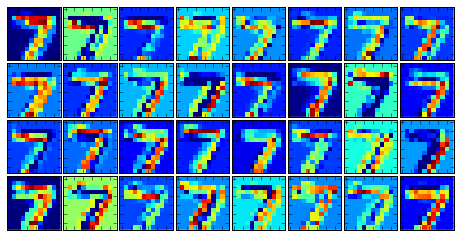

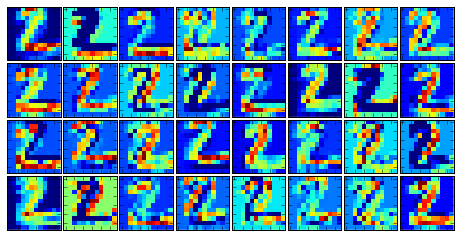

In [138]:
def draw(fig_num, row_num, col_num, i):
    fig = plt.figure(fig_num, figsize=(col_num, row_num))
    ax = fig.add_subplot(row_num, col_num, i)
    ax.imshow(r[fig_num - 1, i - 1], interpolation='none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

margins = {
    "wspace": .05,
    "hspace": .05
}
[draw(1, 4, 8, i) for i in range(1, 33)]
plt.figure(1).subplots_adjust(**margins)

[draw(2, 4, 8, i) for i in range(1, 33)]
plt.figure(2).subplots_adjust(**margins)